# Prediciendo la diabetes 

In [7]:
#!pip install pandas
#!pip install matplotlib
!pip install statsmodels
!pip install StandardScaler
!pip install "dask[distributed]"
!pip install imbalanced-learn
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 58.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 17.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 7.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 47.2 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 751.2/751.2 kB 19.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 1.7 MB/s eta 0:00:00
     ━━

In [10]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split as tts
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib
import requests
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, DecisionTreeRegressor
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import seaborn as sns

### Paso 1: Carga del conjunto de datos

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

In [12]:
df.shape

(768, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
aux = df.nunique().sort_values().head()
aux1 = df.nunique().sort_values().tail()
print(f''' 
      Unique values sorted head(5):
      
      {aux}
      
      Unique values sorted tail(5)
      
      {aux1}
      ''')

 
      Unique values sorted head(5):
      
      Outcome           2
Pregnancies      17
BloodPressure    47
SkinThickness    51
Age              52
dtype: int64
      
      Unique values sorted tail(5)
      
      Age                          52
Glucose                     136
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
dtype: int64
      


In [18]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.isna().sum().sum()

np.int64(0)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [20]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=42)

### Paso 2: Construye un random forest

In [22]:
model_1 = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=2, min_samples_leaf=20)
model_2 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20, min_samples_leaf=1)

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [23]:
model_1_train = model_1.predict(X_train)
model_1_test = model_1.predict(X_test)
print(model_1_test)

model_2_train = model_2.predict(X_train)
model_2_test = model_2.predict(X_test)

[1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0]


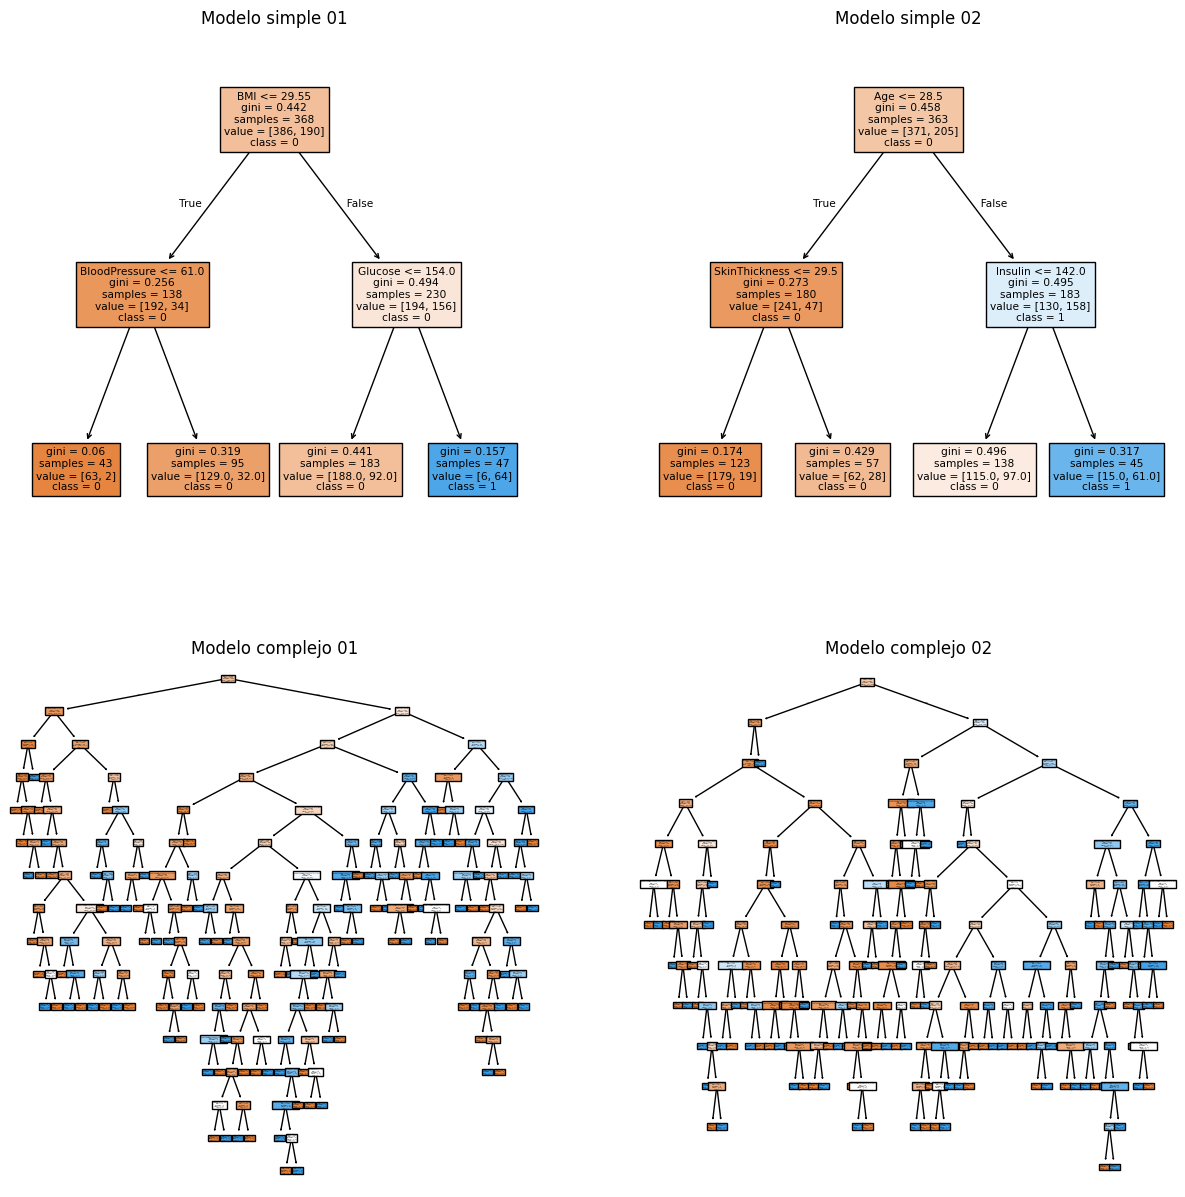

In [26]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

tree.plot_tree(model_1.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
axis[0, 0].set_title('Modelo simple 01')
tree.plot_tree(model_1.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
axis[0, 1].set_title('Modelo simple 02')
tree.plot_tree(model_2.estimators_[0], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
axis[1, 0].set_title('Modelo complejo 01')
tree.plot_tree(model_2.estimators_[1], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
axis[1, 1].set_title('Modelo complejo 02')

plt.show()

In [27]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [28]:
print(f'Modelo complejo:')
print(f'''{get_metrics(y_train, y_test, model_2_train, model_2_test)}
      ''')

print(f'Modelo simple:')
print(f'''{get_metrics(y_train, y_test, model_1_train, model_1_test)}
      ''')

Modelo complejo:
            Accuracy        F1       AUC  Precision    Recall  Specificity
Train       1.000000  1.000000  1.000000      1.000  1.000000     1.000000
Test        0.734375  0.638298  0.716331      0.625  0.652174     0.780488
Diferencia  0.265625  0.361702  0.283669      0.375  0.347826     0.219512
      
Modelo simple:
            Accuracy        F1       AUC  Precision    Recall  Specificity
Train       0.772569  0.558923  0.688649   0.846939  0.417085     0.960212
Test        0.734375  0.532110  0.665429   0.725000  0.420290     0.910569
Diferencia  0.038194  0.026812  0.023219   0.121939 -0.003204     0.049643
      


In [29]:
mid_model_2_train = model_2.predict(X_train)
mid_model_2_test = model_2.predict(X_test)

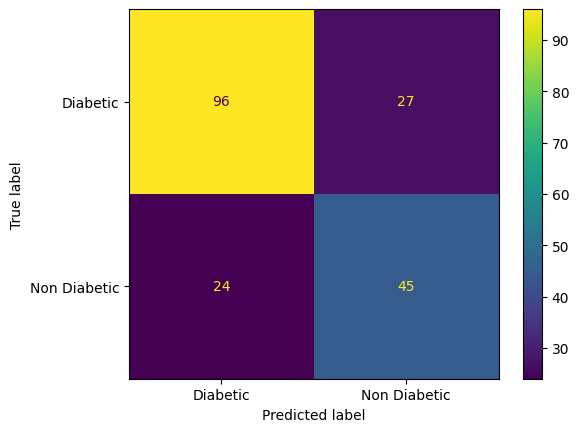

In [30]:
cm = confusion_matrix(y_test, mid_model_2_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Diabetic', 'Non Diabetic'])
disp.plot()

In [31]:
ComplexTreeMetrics = get_metrics(y_train, y_test, model_2_train, model_2_test)
SimpleTreeMetrics = get_metrics(y_train, y_test, model_1_train, model_1_test)
MidComplexTreeMetrics = get_metrics(y_train,y_test,mid_model_2_train,mid_model_2_test)
origin_names = ['ComplexTreeMetrics', 'SimpleTreeMetrics', 'MidComplexTreeMetrics']
df_metrics = pd.concat((ComplexTreeMetrics,SimpleTreeMetrics,MidComplexTreeMetrics), keys=origin_names)
df_metrics

Accuracy        F1       AUC  Precision  \
ComplexTreeMetrics    Train       1.000000  1.000000  1.000000   1.000000   
                      Test        0.734375  0.638298  0.716331   0.625000   
                      Diferencia  0.265625  0.361702  0.283669   0.375000   
SimpleTreeMetrics     Train       0.772569  0.558923  0.688649   0.846939   
                      Test        0.734375  0.532110  0.665429   0.725000   
                      Diferencia  0.038194  0.026812  0.023219   0.121939   
MidComplexTreeMetrics Train       1.000000  1.000000  1.000000   1.000000   
                      Test        0.734375  0.638298  0.716331   0.625000   
                      Diferencia  0.265625  0.361702  0.283669   0.375000   

                                    Recall  Specificity  
ComplexTreeMetrics    Train       1.000000     1.000000  
                      Test        0.652174     0.780488  
                      Diferencia  0.347826     0.219512  
SimpleTreeMetrics     Train       0.417085     0.960212  
                      Test        0.420290     0.910569  
                      Diferencia -0.003204     0.049643  
MidComplexTreeMetrics Train       1.000000     1.000000  
                      Test        0.652174     0.780488  
                      Diferencia  0.347826     0.219512

### Paso 3: Guarda el modelo

In [33]:
from pickle import dump

dump(mid_model_2_train, open("../models/ranfor_classifier_nestimators-60_42.sav", "wb"))